# Airfoil experiments
All data is available in the repository

In [1]:
import sys
sys.path.append('../python')

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from machine_learning import *
import os
from notebook_network_size import find_best_network_size_notebook, try_best_network_sizes
from train_single_network import train_single_network
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


# Setup

(5120, 6)
(5120, 3)


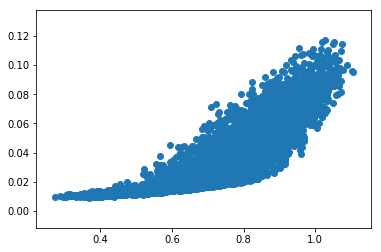

In [2]:
mc_points_preprocessed = np.loadtxt('../mc6.txt')
forces = np.loadtxt('../force_6_params_mc.dat')
mc_points = []
for f in forces[:,0]:
    for n in range(mc_points_preprocessed.shape[0]):
        if mc_points_preprocessed[n,0] == f:
            mc_points.append(mc_points_preprocessed[n,1:])
mc_points = np.array(mc_points)




input_size=6
train_size=128
validation_size=128

epochs = 500000

airfoils_network = [12, 12, 10, 12, 10, 12, 10, 10, 12,1]

print(mc_points.shape)
print(forces.shape)
plt.scatter(forces[:,1], forces[:,2])

# Network size


Config 4 x 6 ([0 x 0] / [5 x 5])
Training and postprocessing took: 6.6610023975372314 seconds (0.11101670662562052 minutes) (0.001850278443760342 hours)
Config 4 x 12 ([0 x 1] / [5 x 5])
Training and postprocessing took: 8.593478679656982 seconds (0.1432246446609497 minutes) (0.002387077411015828 hours)
Config 4 x 24 ([0 x 2] / [5 x 5])
Training and postprocessing took: 11.447373390197754 seconds (0.1907895565032959 minutes) (0.0031798259417215985 hours)
Config 4 x 48 ([0 x 3] / [5 x 5])
Training and postprocessing took: 15.975512504577637 seconds (0.2662585417429606 minutes) (0.004437642362382676 hours)
Config 4 x 96 ([0 x 4] / [5 x 5])
Training and postprocessing took: 19.648709535598755 seconds (0.32747849225997927 minutes) (0.005457974870999654 hours)
Config 8 x 6 ([1 x 0] / [5 x 5])
Training and postprocessing took: 28.949645519256592 seconds (0.48249409198760984 minutes) (0.008041568199793497 hours)
Config 8 x 12 ([1 x 1] / [5 x 5])
Training and postprocessing took: 35.4439268112

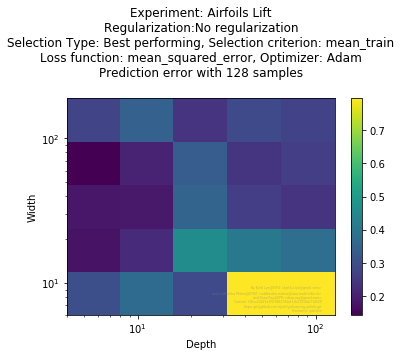

Memory usage: 8514564
all_errors_map[Error mean]=\ 
[[0.09403205 0.01498823 0.01813263 0.00481967 0.21102352]
 [0.27622219 0.0292882  0.0093698  0.08803114 0.29472755]
 [0.08991484 0.40172592 0.27871659 0.23592275 0.01272372]
 [0.77348786 0.33629584 0.1083917  0.01133439 0.16323293]
 [0.77115766 0.29184422 0.0056193  0.09948683 0.1241839 ]]


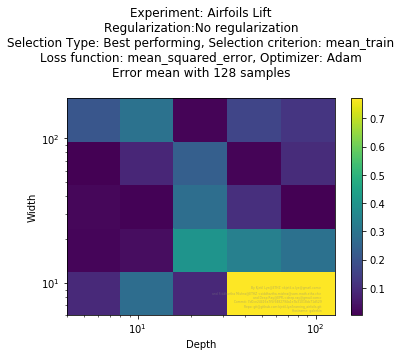

Memory usage: 8514660
all_errors_map[Error variance]=\ 
[[0.31918824 0.53840075 0.57592725 0.44327266 0.73828048]
 [0.83426821 0.78582378 0.72141084 0.88587298 0.91065998]
 [0.86686289 0.88065981 0.88144156 0.99799426 0.99973969]
 [0.99999989 0.99770124 0.9997182  0.99999848 1.00000105]
 [0.9999999  0.99999993 1.0000034  1.00000391 1.00000129]]


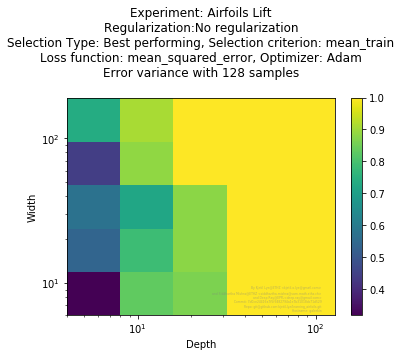

Memory usage: 8514660
all_errors_map[Wasserstein]=\ 
[[0.06485361 0.04713923 0.05188611 0.03832941 0.14447068]
 [0.19278317 0.07908341 0.0683507  0.10263963 0.202856  ]
 [0.10249733 0.27598817 0.19253469 0.18556912 0.13824745]
 [0.53042476 0.24008702 0.15067557 0.1406663  0.16312284]
 [0.52882583 0.21556636 0.14066264 0.15103546 0.15322203]]


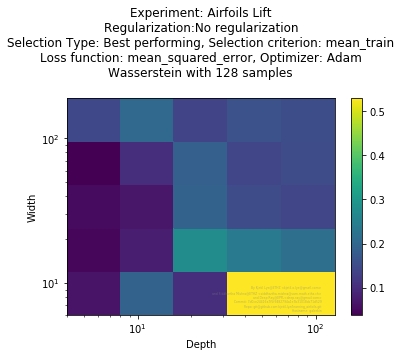

Memory usage: 8514660
all_errors_map[Selection error (mean_train)]=\ 
[[ 7.31506141  2.36713825  2.40832658  1.05255947 18.61101514]
 [24.32529834  3.04724298  2.53380351  7.95253764 25.41111412]
 [ 7.50786765 33.36110536 23.84790142 20.83797067  2.24803172]
 [67.61850256 29.09870675  9.72329781  2.29665933 14.4376065 ]
 [67.41543676 25.64548951  2.13943187  8.98407321 11.03466982]]


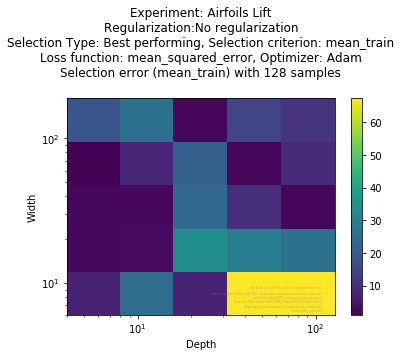

Memory usage: 8514700


Config 4 x 6 ([0 x 0] / [5 x 5])


KeyboardInterrupt: 

In [3]:
force_names=['Lift', 'Drag']

for n, force_name in enumerate(force_names):
    display(HTML("<h1>%s</h1>"% force_name))
    try_best_network_sizes(parameters=mc_points, 
                           samples=forces[:,n+1], 
                           base_title='Airfoils MC %s' % force_name,
                          epochs=epochs)

# One network per variable


Training took 88.11796474456787 seconds


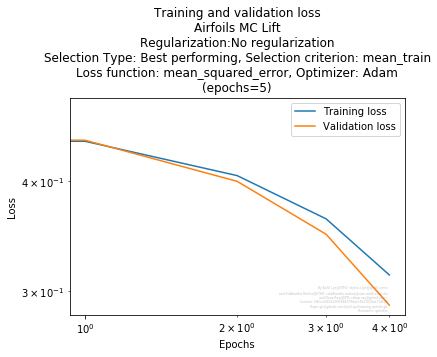


Training took 96.13391923904419 seconds


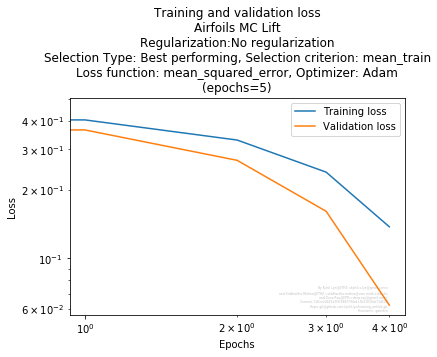


Training took 93.02643704414368 seconds


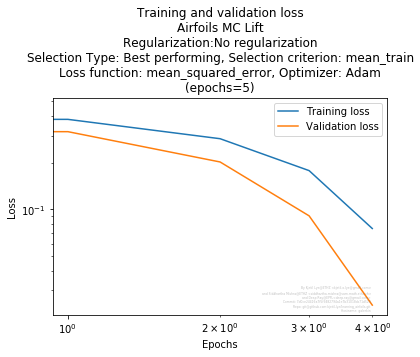

Best network index: 2
Total learning time took: 699 s
Training took 216.63402199745178 seconds


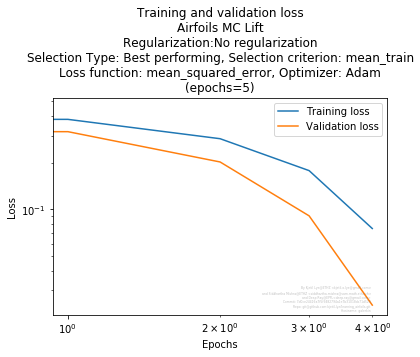

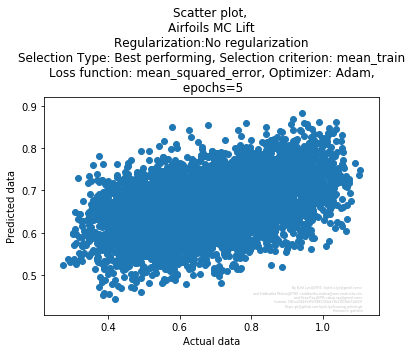

Number of parameters: 1149


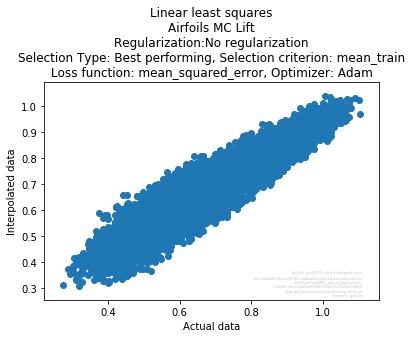

(5120,)
(5120, 6)


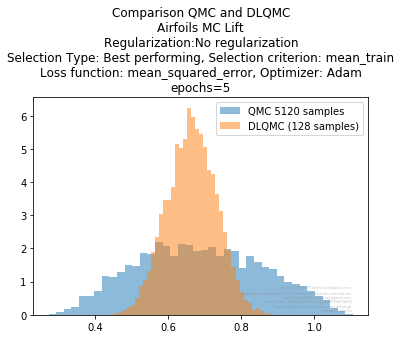

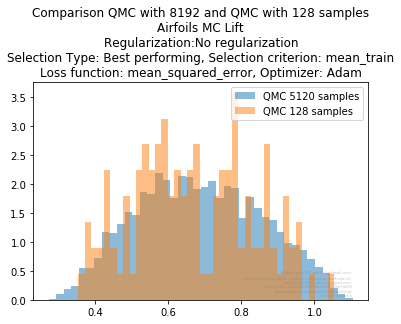

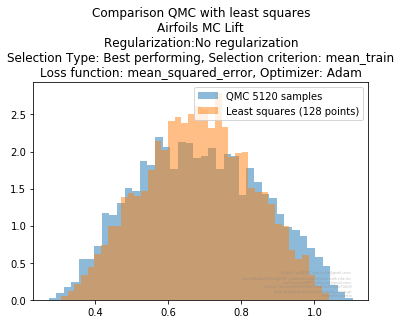

Memory usage: 8737452
Memory usage: 8737452


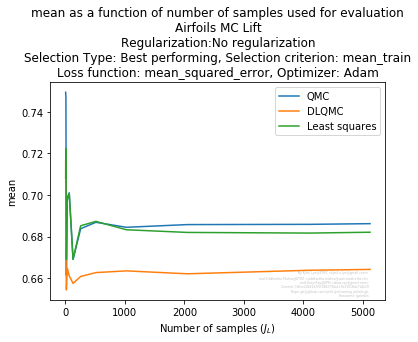

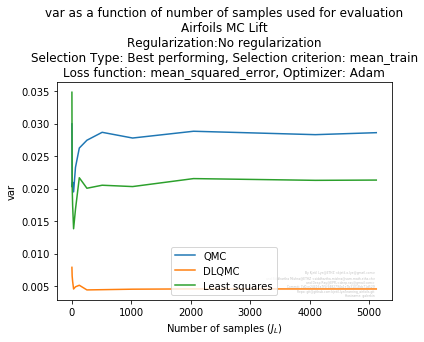

Memory usage: 8737452


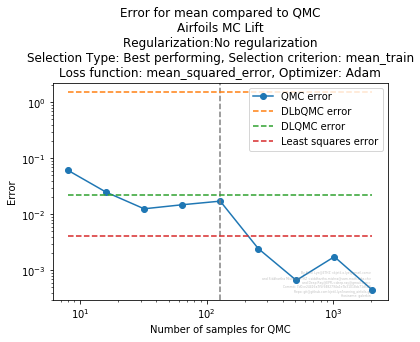

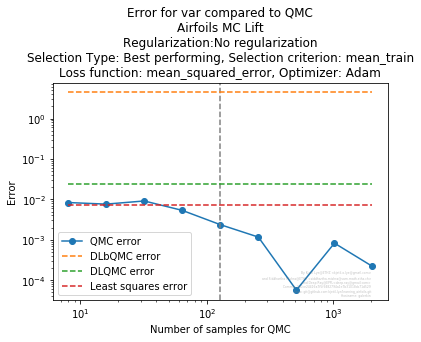

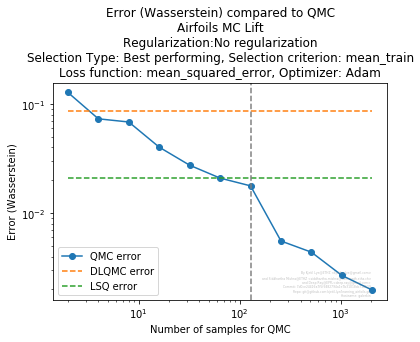


Training took 90.53534698486328 seconds


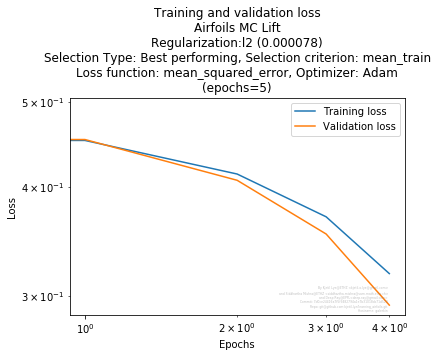


Training took 87.73255658149719 seconds


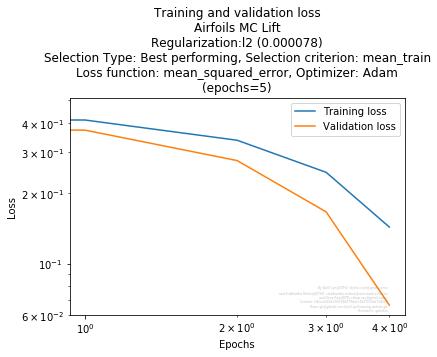


Training took 90.09371519088745 seconds


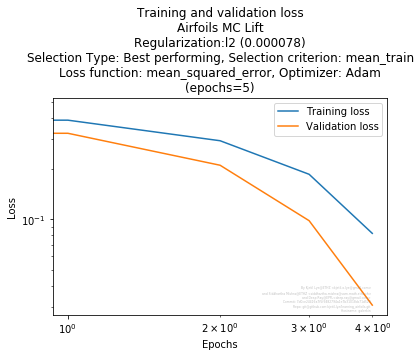

Best network index: 2
Total learning time took: 676 s
Training took 210.69175601005554 seconds


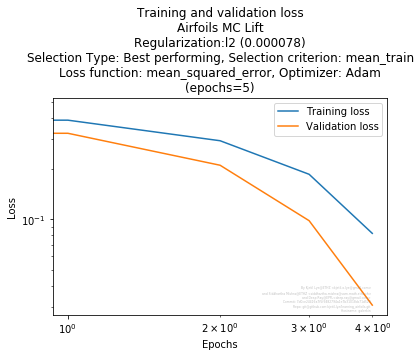

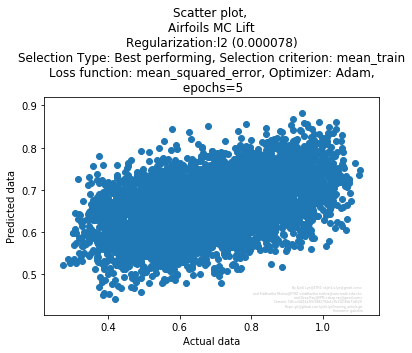

Number of parameters: 1149


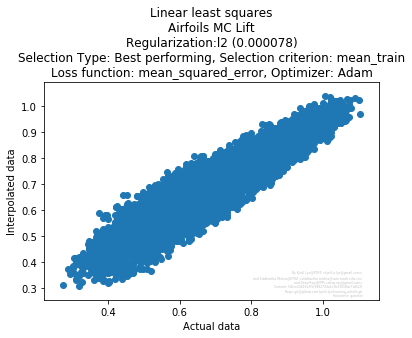

(5120,)
(5120, 6)


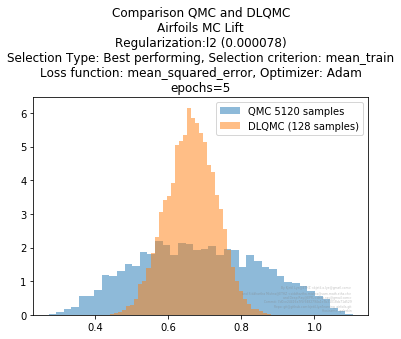

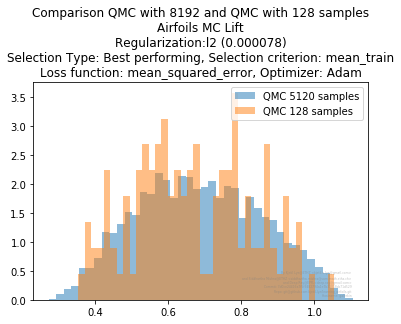

In [ ]:
force_names=['Lift', 'Drag']

for n, force_name in enumerate(force_names):
    display(HTML("<h1>%s</h1>"% force_name))
    train_single_network(parameters=mc_points, 
                         samples=forces[:,n+1], 
                         base_title='Airfoils MC %s' % force_name,
                         network = airfoils_network,
                         epochs=epochs, 
                         large_integration_points = None)